In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
data = pd.read_csv("./data/train.csv")

In [3]:
data = np.array(data)

In [4]:
m, n = data.shape
np.random.shuffle(data)

data_dev = data[0:1000].T
Y_dev = data_dev[0]
X_dev = data_dev[1:n] / 255

data_train = data[1000:m].T
Y_train = data_train[0]
X_train = data_train[1:n] / 255


In [5]:
def init_params():
    W1 = np.random.rand(10, 784) - 0.5
    b1 = np.random.rand(10, 1) - 0.5
    W2 = np.random.rand(10, 10) - 0.5
    b2 = np.random.rand(10, 1) - 0.5
    return W1, b1, W2, b2


def ReLU(Z):
    return np.maximum(0, Z)


def deriv_ReLU(Z):
    return Z > 0


def softmax(Z):
    exp = np.exp(Z - np.max(Z))
    return exp / exp.sum(axis=0)


def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    return one_hot_Y.T


def forward_prop(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2


def back_prop(Z1, A1, Z2, A2, W2, X, Y):
    m = Y.size
    one_hot_Y = one_hot(Y)
    dZ2 = 2 * (A2 - one_hot_Y)
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2, 1)
    dZ1 = W2.T.dot(dZ2) * deriv_ReLU(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1, 1)
    return dW1, db1, dW2, db2


def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * np.reshape(db1, (10, 1))
    W2 = W2 - alpha * dW2
    b2 = b2 - alpha * np.reshape(db2, (10, 1))
    return W1, b1, W2, b2

In [6]:
def get_preds(A2):
    return np.argmax(A2, 0)


def get_accuracy(predictions, Y):
    return np.sum(predictions == Y) / Y.size


def gradient_descent(X, Y, iterations, alpha):
    W1, b1, W2, b2 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = back_prop(Z1, A1, Z2, A2, W2, X, Y)
        W1, b1, W2, b2 = update_params(
            W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if i % 10 == 0:
            print("Iteration: ", i)
            print("Accuracy: ", get_accuracy(get_preds(A2), Y))
    return W1, b1, W2, b2


In [7]:
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 500, 0.2)


Iteration:  0
Accuracy:  0.11714634146341464
Iteration:  10
Accuracy:  0.33119512195121953
Iteration:  20
Accuracy:  0.49317073170731707
Iteration:  30
Accuracy:  0.6015121951219512
Iteration:  40
Accuracy:  0.6586585365853659
Iteration:  50
Accuracy:  0.704170731707317
Iteration:  60
Accuracy:  0.734609756097561
Iteration:  70
Accuracy:  0.7452439024390244
Iteration:  80
Accuracy:  0.779609756097561
Iteration:  90
Accuracy:  0.7948048780487805
Iteration:  100
Accuracy:  0.8048048780487805
Iteration:  110
Accuracy:  0.8168536585365853
Iteration:  120
Accuracy:  0.8267560975609756
Iteration:  130
Accuracy:  0.8337073170731707
Iteration:  140
Accuracy:  0.8390243902439024
Iteration:  150
Accuracy:  0.8436585365853658
Iteration:  160
Accuracy:  0.8493414634146341
Iteration:  170
Accuracy:  0.8537560975609756
Iteration:  180
Accuracy:  0.8575609756097561
Iteration:  190
Accuracy:  0.8602439024390244
Iteration:  200
Accuracy:  0.8624390243902439
Iteration:  210
Accuracy:  0.8648780487804878

In [8]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_preds(A2)
    return predictions


def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(current_image, W1, b1, W2, b2)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)

    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation="nearest")
    plt.show()

Prediction:  [2]
Label:  2


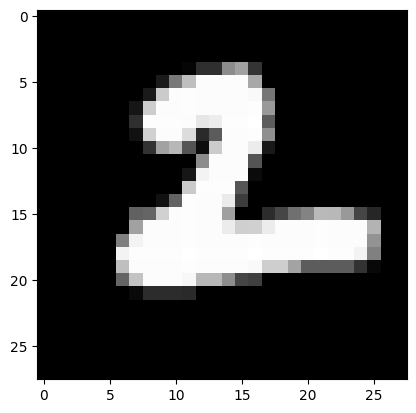

In [9]:
test_prediction(116, W1, b1, W2, b2)

In [10]:
dev_preds = make_predictions(X_dev, W1, b1, W2, b2)
get_accuracy(dev_preds, Y_dev)


0.882